In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

In [73]:
color = ["#e41a1c", "#377eb8"]

In [74]:
myRobot = Robot(seed=24)
myRobot.vary_a1 = False
myRobot.k_red = 9
traindata = myRobot.simulate(5000, black_box=False)
valdata = myRobot.simulate(5000, black_box=False)
caldata = myRobot.simulate(2000, black_box=False)

In [75]:
traindata

,color,x1,x2,a1,a2,r1,r2
0,red,11.349119,-6.861865,5.523416,1.244737,11.993254,3
1,red,-9.814358,-12.180208,3.850098,1.267038,14.480720,3
2,blue,-0.415813,-4.556312,4.609960,3.124176,7.574493,3
3,red,16.718037,-2.885448,6.079409,0.186908,14.008305,3
4,blue,6.793663,11.831265,0.898411,0.754240,11.301134,3
...,...,...,...,...,...,...,...
4995,red,12.473004,9.064236,0.452712,2.025342,16.498437,3
4996,blue,-4.413645,3.768530,1.929177,1.927284,6.124177,3
4997,blue,-8.688196,-1.127573,2.925565,1.726531,8.709872,3
4998,red,0.988998,12.277425,1.402873,2.774431,15.070077,3


<Axes: xlabel='x1', ylabel='x2'>

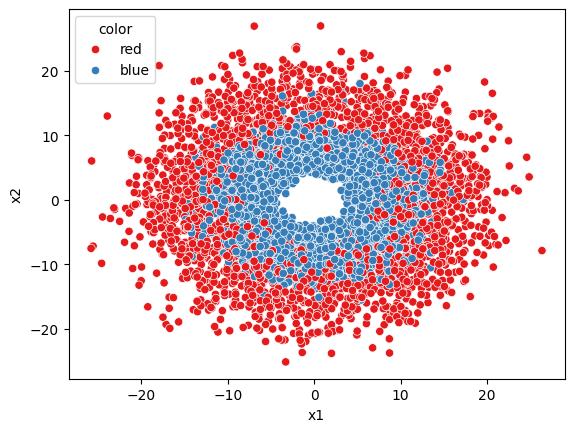

In [76]:
sn.scatterplot(traindata, x="x1", y="x2", hue="color", palette=color)

<Axes: xlabel='r1', ylabel='Count'>

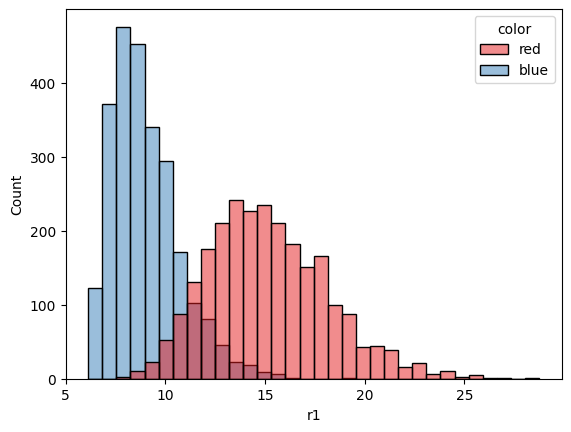

In [77]:
sn.histplot(traindata, x="r1", hue="color", palette=color)

<Axes: xlabel='a1', ylabel='Count'>

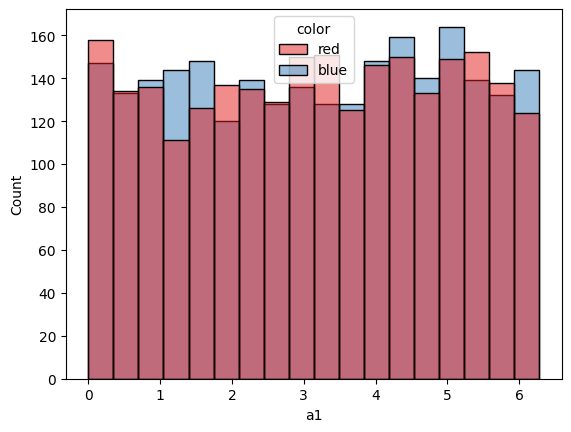

In [78]:
sn.histplot(traindata, x="a1", hue="color", palette=color)

<Axes: xlabel='x1', ylabel='Count'>

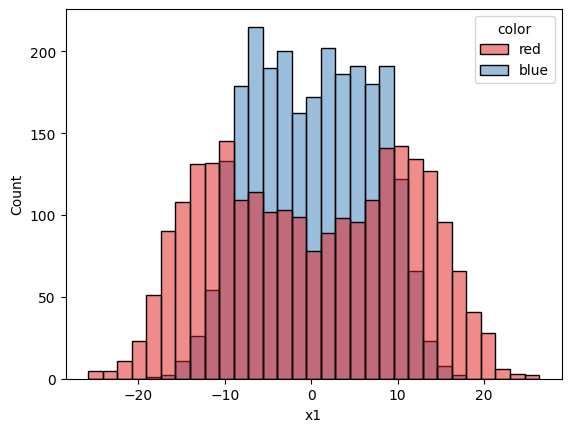

In [79]:
sn.histplot(traindata, x="x1", hue="color", palette=color)

<Axes: xlabel='x2', ylabel='Count'>

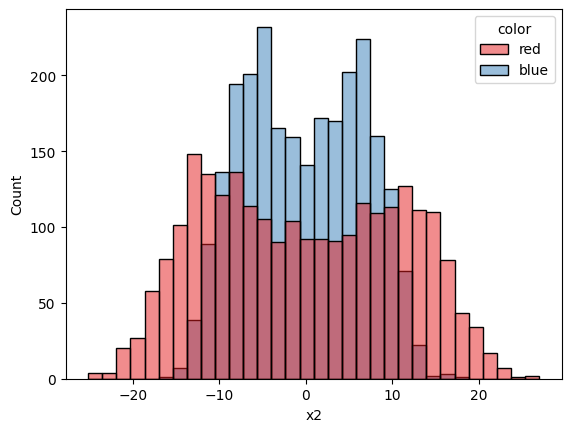

In [80]:
sn.histplot(traindata, x="x2", hue="color", palette=color)

In [81]:
params = myRobot.get_parameters()
params

{'seed': 24, 'R2': 3, 'k_red': 9, 'k_blue': 3, 'scale': 1, 'vary_a1': False}

In [82]:
# Convert to polar coordinates
def cartesian_to_polar(df, x_key, y_key, r_key, theta_key):
    df[r_key] = np.sqrt(df[x_key]**2 + df[y_key]**2)
    df[theta_key] = np.arctan(df[y_key]/df[x_key])
    #Get angles in range 0, 2pi
    df_copy = df.copy()
    mask1 = df_copy[x_key] < 0
    df.loc[mask1, theta_key] = df[theta_key] + np.pi
    df_copy = df.copy()
    mask2 = df_copy[theta_key] < 0
    df.loc[mask2, theta_key] = df[theta_key] + 2*np.pi
    return df

def polar_to_cartesian(df, x_key, y_key, r_key, theta_key):
    df[x_key] = df[r_key]*np.cos(df[theta_key])
    df[y_key] = df[r_key]*np.sin(df[theta_key])
    return df
#traindata = cartesian_to_polar(traindata, "x1", "x2", "r_x", "a_x")
#traindata = polar_to_cartesian(traindata, "x1_test", "x2_test", "r_x", "a_x")
#sn.histplot(traindata, x="a_x")

In [83]:
# Save data

traindata = cartesian_to_polar(traindata, "x1", "x2", "r_x", "a_x")
valdata = cartesian_to_polar(valdata, "x1", "x2", "r_x", "a_x")
caldata = cartesian_to_polar(caldata, "x1", "x2", "r_x", "a_x")

#traindata.to_csv(f'data/train_n_{len(traindata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)
#testdata.to_csv(f'data/test_n_{len(testdata)}_kr{params["k_red"]}_kg{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)
#valdata.to_csv(f'data/val_n_{len(valdata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)
#caldata.to_csv(f'data/cal_n_{len(caldata)}_kr{params["k_red"]}_kb{params["k_blue"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)

In [84]:
traindata

,color,x1,x2,a1,a2,r1,r2,r_x,a_x
0,red,11.349119,-6.861865,5.523416,1.244737,11.993254,3,13.262266,5.739378
1,red,-9.814358,-12.180208,3.850098,1.267038,14.480720,3,15.642222,4.034144
2,blue,-0.415813,-4.556312,4.609960,3.124176,7.574493,3,4.575246,4.621380
3,red,16.718037,-2.885448,6.079409,0.186908,14.008305,3,16.965217,6.112274
4,blue,6.793663,11.831265,0.898411,0.754240,11.301134,3,13.643046,1.049554
...,...,...,...,...,...,...,...,...,...
4995,red,12.473004,9.064236,0.452712,2.025342,16.498437,3,15.418697,0.628427
4996,blue,-4.413645,3.768530,1.929177,1.927284,6.124177,3,5.803627,2.434876
4997,blue,-8.688196,-1.127573,2.925565,1.726531,8.709872,3,8.761060,3.270653
4998,red,0.988998,12.277425,1.402873,2.774431,15.070077,3,12.317195,1.490416


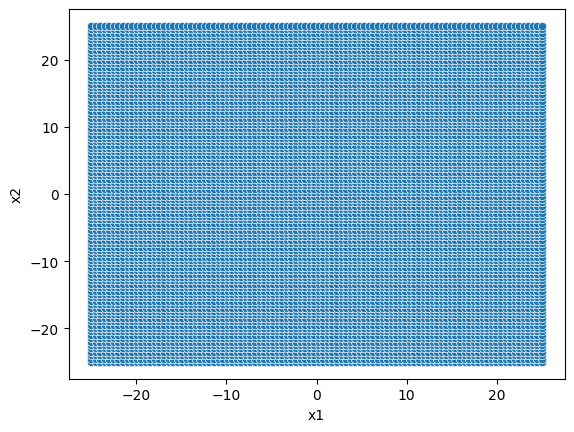

In [87]:
#Make grid for testing against analytical solution
nx = 100
x1 = np.linspace(-25, 25, nx)
x2 = np.linspace(-25, 25, nx)
xx1, xx2 = np.meshgrid(x1, x2)
grid_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(xx1.flatten())))
grid_df["x1"] = xx1.flatten()
grid_df["x2"] = xx2.flatten()
grid_df = cartesian_to_polar(grid_df, "x1", "x2", "r_x", "a_x")
sn.scatterplot(grid_df, x="x1", y="x2")
grid_df.to_csv('data/x1_x2_grid.csv')

<Axes: xlabel='x1', ylabel='x2'>

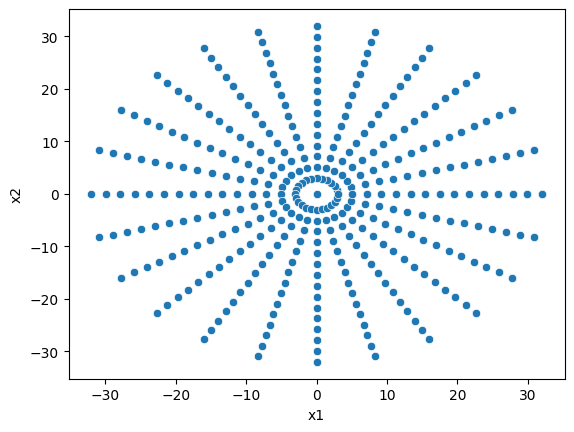

In [88]:
def robot_arm(theta1, theta2, r1, r2):
    ya = r1*np.cos(theta1) + r2*np.cos(theta1 + theta2)
    yb = r1*np.sin(theta1) + r2*np.sin(theta1 + theta2)
    return ya, yb

nx = 25
a1 = np.linspace(0, 2*np.pi, nx)
a2 = 0*a1 + np.pi
#aa1, aa2 = np.meshgrid(a1, a2)
r1_list = np.linspace(2*myRobot.R2, 35, 15)

output = np.array([robot_arm(a1, a2, r, r2=myRobot.R2) for r in r1_list])

circles_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(output[:,0].flatten()+1)))

circles_df["x1"] = np.array(output[:,0]).flatten()
circles_df["x2"] = np.array(output[:,1]).flatten()
circles_df.loc[-1] = [0,0]

circles_df = cartesian_to_polar(circles_df, "x1", "x2", "r_x", "a_x")

sn.scatterplot(circles_df, x="x1", y="x2")
#circles_df.to_csv('data/x1_x2_circles.csv')